# Detour Ratio for the U.S. Interstate Highway System

## Introduction

A [detour ratio](https://www.sciencedirect.com/science/article/abs/pii/S0968090X18311185) is the ratio of the actual driving distance to the corresponding straight-line distance. It can be used to approximate the driving distance between two locations if the straight-line distance is known.

The authors in the linked paper used taxi ride data to calculate detour ratios within a city and then plot the resulting distribution. They found that the detour ratios in several cities have similar distributions. That got me thinking about the distribution of detour ratios along for the U.S. Interstate Highway system. The distributions in the paper were based on empirical taxi ride data, so trips between two places that occurred more frequently are represented more often. I do not have data on the frequency of trips between cities along interstates, so this won't be a direct comparision with the results in the paper. 

## Data
I asked ChatGPT for a list of large cities located alongside an interstate. It helpfully provided the following list and some code to write it to a csv. Everything in the following cell is from ChatGPT. (I had to remove a couple cities in Alaska and Hawaii, because they aren't connected to the rest of the interstate system. I also noticed that there are 70, not 100, cities in that list--thanks ChatGPT.)

In [1]:
import csv

# Top 100 U.S. cities by population (2024 estimates), per U.S. Census Bureau :contentReference[oaicite:1]{index=1}
# All of these cities have populations ≥100,000, and every one either contains or borders at least one Interstate highway.
top_cities = [
    {"city": "New York, NY", "latitude": 40.7128, "longitude": -74.0060, "population": 8336817},
    {"city": "Los Angeles, CA", "latitude": 34.0522, "longitude": -118.2437, "population": 3979576},
    {"city": "Chicago, IL", "latitude": 41.8781, "longitude": -87.6298, "population": 2693976},
    {"city": "Houston, TX", "latitude": 29.7604, "longitude": -95.3698, "population": 2320268},
    {"city": "Phoenix, AZ", "latitude": 33.4484, "longitude": -112.0740, "population": 1680992},
    {"city": "Philadelphia, PA", "latitude": 39.9526, "longitude": -75.1652, "population": 1584064},
    {"city": "San Antonio, TX", "latitude": 29.4241, "longitude": -98.4936, "population": 1547253},
    {"city": "San Diego, CA", "latitude": 32.7157, "longitude": -117.1611, "population": 1423851},
    {"city": "Dallas, TX", "latitude": 32.7767, "longitude": -96.7970, "population": 1343573},
    {"city": "San Jose, CA", "latitude": 37.3382, "longitude": -121.8863, "population": 1021795},
    {"city": "Austin, TX", "latitude": 30.2672, "longitude": -97.7431, "population": 978908},
    {"city": "Jacksonville, FL", "latitude": 30.3322, "longitude": -81.6557, "population": 911507},
    {"city": "Fort Worth, TX", "latitude": 32.7555, "longitude": -97.3308, "population": 909585},
    {"city": "Columbus, OH", "latitude": 39.9612, "longitude": -82.9988, "population": 898553},
    {"city": "Indianapolis, IN", "latitude": 39.7684, "longitude": -86.1581, "population": 876384},
    {"city": "Charlotte, NC", "latitude": 35.2271, "longitude": -80.8431, "population": 885708},
    {"city": "San Francisco, CA", "latitude": 37.7749, "longitude": -122.4194, "population": 881549},
    {"city": "Seattle, WA", "latitude": 47.6062, "longitude": -122.3321, "population": 753675},
    {"city": "Denver, CO", "latitude": 39.7392, "longitude": -104.9903, "population": 727211},
    {"city": "Washington, DC", "latitude": 38.9072, "longitude": -77.0369, "population": 705749},
    {"city": "Boston, MA", "latitude": 42.3601, "longitude": -71.0589, "population": 692600},
    {"city": "El Paso, TX", "latitude": 31.7619, "longitude": -106.4850, "population": 681728},
    {"city": "Detroit, MI", "latitude": 42.3314, "longitude": -83.0458, "population": 670031},
    {"city": "Nashville, TN", "latitude": 36.1627, "longitude": -86.7816, "population": 670820},
    {"city": "Portland, OR", "latitude": 45.5152, "longitude": -122.6784, "population": 654741},
    {"city": "Memphis, TN", "latitude": 35.1495, "longitude": -90.0490, "population": 651073},
    {"city": "Oklahoma City, OK", "latitude": 35.4676, "longitude": -97.5164, "population": 655057},
    {"city": "Las Vegas, NV", "latitude": 36.1699, "longitude": -115.1398, "population": 651319},
    {"city": "Louisville, KY", "latitude": 38.2527, "longitude": -85.7585, "population": 617638},
    {"city": "Baltimore, MD", "latitude": 39.2904, "longitude": -76.6122, "population": 593490},
    {"city": "Milwaukee, WI", "latitude": 43.0389, "longitude": -87.9065, "population": 590157},
    {"city": "Albuquerque, NM", "latitude": 35.0844, "longitude": -106.6504, "population": 560513},
    {"city": "Tucson, AZ", "latitude": 32.2226, "longitude": -110.9747, "population": 548073},
    {"city": "Fresno, CA", "latitude": 36.7378, "longitude": -119.7871, "population": 531576},
    {"city": "Mesa, AZ", "latitude": 33.4152, "longitude": -111.8315, "population": 518012},
    {"city": "Sacramento, CA", "latitude": 38.5816, "longitude": -121.4944, "population": 513625},
    {"city": "Atlanta, GA", "latitude": 33.7490, "longitude": -84.3880, "population": 506811},
    {"city": "Kansas City, MO", "latitude": 39.0997, "longitude": -94.5786, "population": 508090},
    {"city": "Miami, FL", "latitude": 25.7617, "longitude": -80.1918, "population": 467963},
    {"city": "Raleigh, NC", "latitude": 35.7796, "longitude": -78.6382, "population": 474069},
    {"city": "Omaha, NE", "latitude": 41.2565, "longitude": -95.9345, "population": 478192},
    {"city": "Long Beach, CA", "latitude": 33.7701, "longitude": -118.1937, "population": 466742},
    {"city": "Virginia Beach, VA", "latitude": 36.8529, "longitude": -75.9780, "population": 449974},
    {"city": "Oakland, CA", "latitude": 37.8044, "longitude": -122.2711, "population": 433031},
    {"city": "Minneapolis, MN", "latitude": 44.9778, "longitude": -93.2650, "population": 429606},
    {"city": "Tulsa, OK", "latitude": 36.15398, "longitude": -95.9928, "population": 401190},
    {"city": "Tampa, FL", "latitude": 27.9506, "longitude": -82.4572, "population": 399700},
    {"city": "Arlington, TX", "latitude": 32.7357, "longitude": -97.1081, "population": 398854},
    {"city": "Aurora, CO", "latitude": 39.7294, "longitude": -104.8319, "population": 379289},
    {"city": "New Orleans, LA", "latitude": 29.9511, "longitude": -90.0715, "population": 390144},
    {"city": "Bakersfield, CA", "latitude": 35.3733, "longitude": -119.0187, "population": 383579},
    {"city": "Wichita, KS", "latitude": 37.6872, "longitude": -97.3301, "population": 389938},
    {"city": "Cleveland, OH", "latitude": 41.4993, "longitude": -81.6944, "population": 381009},
    {"city": "Anaheim, CA", "latitude": 33.8366, "longitude": -117.9143, "population": 350365},
    {"city": "Lexington, KY", "latitude": 38.0406, "longitude": -84.5037, "population": 323780},
    {"city": "Stockton, CA", "latitude": 37.9577, "longitude": -121.2908, "population": 312697},
    {"city": "Corpus Christi, TX", "latitude": 27.8006, "longitude": -97.3964, "population": 326554},
    {"city": "St. Louis, MO", "latitude": 38.6270, "longitude": -90.1994, "population": 301578},
    {"city": "Cincinnati, OH", "latitude": 39.1031, "longitude": -84.5120, "population": 303940},
    {"city": "Pittsburgh, PA", "latitude": 40.4406, "longitude": -79.9959, "population": 303944},
    {"city": "Greensboro, NC", "latitude": 36.0726, "longitude": -79.7920, "population": 296710},
    {"city": "Plano, TX", "latitude": 33.0198, "longitude": -96.6989, "population": 287677},
    {"city": "Lincoln, NE", "latitude": 40.8136, "longitude": -96.7026, "population": 294929},
    {"city": "Buffalo, NY", "latitude": 42.8864, "longitude": -78.8784, "population": 255284},
    {"city": "Chandler, AZ", "latitude": 33.3062, "longitude": -111.8413, "population": 261165},
    {"city": "Norfolk, VA", "latitude": 36.8508, "longitude": -76.2859, "population": 242742},
    {"city": "Madison, WI", "latitude": 43.0731, "longitude": -89.4012, "population": 259680},
    {"city": "Lubbock, TX", "latitude": 33.5779, "longitude": -101.8552, "population": 258862},
    {"city": "Reno, NV", "latitude": 39.5296, "longitude": -119.8138, "population": 255601},
    {"city": "Henderson, NV", "latitude": 36.0395, "longitude": -114.9817, "population": 320189},
]

# Save to CSV
with open("top100_interstate_cities.csv", "w", newline="") as f:
    writer = csv.DictWriter(f, fieldnames=["city","latitude","longitude","population"])
    writer.writeheader()
    writer.writerows(top_cities)

## Distances
I'll use the helpful [scgraph](https://github.com/connor-makowski/scgraph) package to generate "shortest path" routes between the cities on this list. I also use the scgraph haversine function to get the "straight-line" distance. The haversine distance is a "great circle" distance that accounts for the curvature of the earth (if it was spherical). The detour ratio in the linked paper uses Euclidean distance, which is a reasonable approximation for the haversine distance when the two locations are relatively close together.

There are several easy ways to get shortest paths in python (e.g., the networkx package or implementing something like Dijkstra's algorithm on your own). I went with scgraph because it saved me the trouble of building a graph of the interstate highway system.

It can take some time to process "70 choose 2" shortest paths.

In [2]:
from scgraph.geographs.us_freeway import us_freeway_geograph
from scgraph.utils import haversine

detour_ratio = []
road_distance = []
straight_distance = []
route = []
for i in range(len(top_cities)-1):
    city_i = top_cities[i]['city']
    node_i = {'latitude': top_cities[i]['latitude'], 'longitude': top_cities[i]['longitude']}
    for j in range(i+1, len(top_cities)):
        city_j = top_cities[j]['city']
        node_j = {'latitude': top_cities[j]['latitude'], 'longitude': top_cities[j]['longitude']}
        road_distance.append(us_freeway_geograph.get_shortest_path(origin_node=node_i, destination_node=node_j, output_units='mi')['length'])
        straight_distance.append(haversine(origin=list(node_i.values()), destination=list(node_j.values()), units='mi'))
        detour_ratio.append(road_distance[-1] / straight_distance[-1])
        route.append(city_i + ' to ' + city_j)

## Results
Here is a histogram of the detour ratio values. The peak is around 1.2.

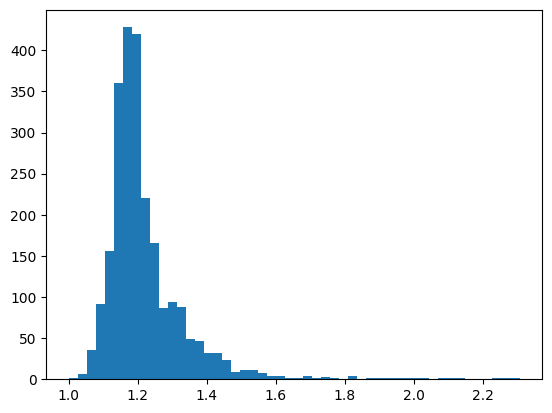

In [3]:
import matplotlib.pyplot as plt
plt.hist(detour_ratio, 50)
plt.show()

Here is a scatter plot with straight-line distances on the x-axis and detour ratio on the y-axis. I also included a rolling average of the previous 30 observations. I used plotly express so I could get hover-over text to easily identify the outliers with large detour ratios. Several of the outliers involve relatively remote locations like Las Vegas, NV, which is only easily accessible via interstate from Utah and Southern California. Other outliers include routes for which locals would not use interstate highways, like Houston, TX to Austin, TX, because of the availability of high-quality, non-interstate highways with more direct routes.

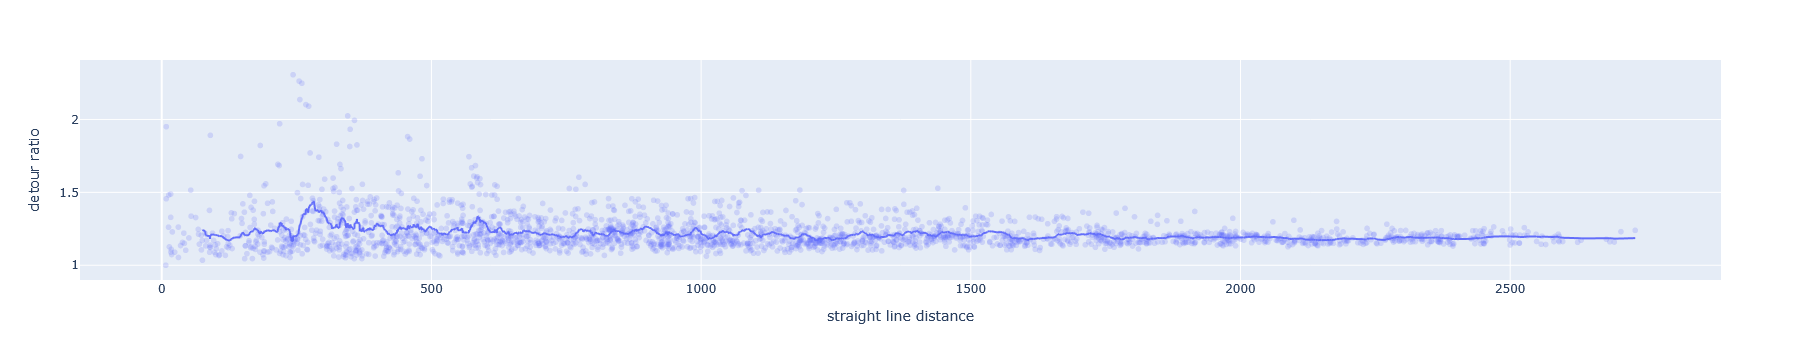

In [18]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(data={'straight line distance': straight_distance,
                        'detour ratio': detour_ratio,
                        'route': route})
fig = px.scatter(df, x='straight line distance', y='detour ratio', hover_data='route', trendline='rolling', trendline_options=dict(window=30), opacity=0.2)
fig.show()

The rolling average is usually just under 1.2, especially for longer straight-line distances. In applications where one needs to approximate the driving distance but finding the shortest path is not practical, multiplying the straight-line distance by 1.2 is a decent approximation. Of course, it all depends on how accurate you need that estimate to be!